## 패키지 참조 + 시드고정

In [1]:
import tensorflow as tf
tf.random.set_seed(777)

from matplotlib import pyplot as plt

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# 기울기를 단순 누적하지 않고 지수, 가중, 이동, 평균을 사용하여 최신 기울기들이 더 크게 반영되도록 하는 경사하강법 공식 중의 하나
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse

## 데이터 준비하기

In [2]:
data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
label = np.array([[0], [1], [1], [0]])      # data 값이 서로 같으면 0, 다르면 1

## 모델 구성하기

In [3]:
model = Sequential()
# 32개의 은닉층 갯수를 만들고 그걸로 조합 가능한 모든 경우의 수를 수행한 후 1개의 출력값을 갖는다.
model.add(Dense(32, input_shape = (2, ), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

## 모델 준비하기

In [4]:
model.compile(optimizer = RMSprop(), loss = mse, metrics = ['acc'])

## 학습시키기

In [5]:
hist = model.fit(data, label, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 972us/step - loss: 0.2646 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 998us/step - loss: 0.2621 - acc: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 997us/step - loss: 0.2603 - acc: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 997us/step - loss: 0.2589 - acc: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 995us/step - loss: 0.2578 - acc: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 998us/step - loss: 0.2568 - acc: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 969us/step - loss: 0.2558 - acc: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.2550 - acc: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 994us/step - loss: 0.2541 - acc: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 997us/step - loss: 0.2533 - acc: 0.2500
Epoch 11/100
1/1 [==============================] - 0s 998us/s

## 모델 평가하기
- 모델의 최종적인 정답률과 loss값을 알 수 있다.
- loss는 예측값과 실제값이 차이나는 정도를 나타내는 지표이다. 작을수록 좋다.

In [6]:
model.evaluate(data, label)

1/1 [==============================] - 0s 997us/step - loss: 0.2106 - acc: 1.0000


[0.21061019599437714, 1.0]

## 모델 사용하기
- 경사하강법은 절대로 이진수가 똑 떨어져서 나오지 않는다. 근사치를 뽑는다.

In [7]:
result = model.predict(data)
print(result)

[[0.48656905]
 [0.54643035]
 [0.55211586]
 [0.44650382]]


## 모델의 손실률과 정확도 시각화

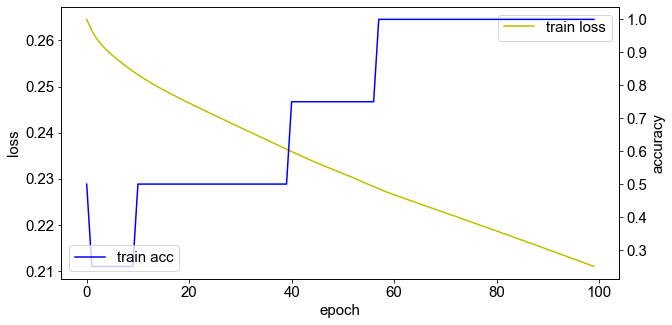

In [8]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 5)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

ax1.plot(hist.history['loss'], 'y', label = 'train loss')
# ax1.plot(hist.history['val_loss'], 'r', label = 'val loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend(bbox_to_anchor = (1, 1))

ax2.plot(hist.history['acc'], 'b', label = 'train acc')
# ax2.plot(hist.history['val_acc'], 'g', label = 'val acc')
ax2.set_ylabel('accuracy')
ax2.legend(loc = 'lower left')

plt.show()